**[Back to Fan's Intro Stat Table of Content](https://fanwangecon.github.io/Stat4Econ/)**

# Throw an Unfair Four Sided Dice

In [Sample Space, Experimental Outcomes, Events, Probabilities](https://fanwangecon.github.io/Stat4Econ/probability/samplespace.html), we discussed various definitions. We went over various examples in [Examples of Sample Space and Probabilities](https://fanwangecon.github.io/Stat4Econ/probability/samplespaceexa.html). Here we look at what happens if we throw a four sided dice many times.

# Throwing a Dice

- Experiment: Throwing a [Four Sided Dice](https://en.wikipedia.org/wiki/Four-sided_die)
- Experimental outcomes: lands on one of the four sides
- Sample Space: $S=\left\{1,2,3,4\right\}$

### An Unfair Dice
In the example below, we will throw an unfair dice, where the probability of landing on the side with 1 is 50 percent, and the chance of landing on each successive side is 50 percent of the chance of landing on the previous side. This is a dice weighted towards the smaller numbers. 

See the table below for the true probabilities of the unfiar dice.

In [7]:
# Load Library
library(tidyverse)

# Define a List of Experimental Outcomes
experimental.outcomes.list <- c(1,2,3,4)

# Probabilities on experimental outcomes
# Suppose dice is weighted towards 1
fracbase <- 0.6
experimental.outcome.prob <- c((1-fracbase)^0*fracbase,
                               (1-fracbase)^1*fracbase,
                               (1-fracbase)^2*fracbase,
                               (1-fracbase)^3)

# Show these in a Tibble
dice.true.prob <- tibble(dice.outcomes.list = experimental.outcomes.list,
                         dice.true.prob = experimental.outcome.prob)
dice.true.prob

dice.outcomes.list,dice.true.prob
1,0.600
2,0.240
3,0.096
4,0.064


### Throw the Dice 5 Times

We throw the dice 5 times, each time, get one of the three possible experimental outcomes, the chance of getting these outcomes are determined by the true probabilities of the unfair dice.

In [8]:
# What could happen tomorrow?
# We live in a probabilistic world, drawing future from a hat
# If we draw 5 times, what happens in the future?
# It's pretty amazing, we get to see the future!
number.of.futures.to.draw = 5
future.dice.draws <- sample(experimental.outcomes.list,
                                 size = number.of.futures.to.draw,
                                 replace = TRUE, 
                                 prob = experimental.outcome.prob)

# A little tibble to show results
tibble(which.future.dice = paste0('dice draws:', 1:number.of.futures.to.draw),
       dice.draws = future.dice.draws)

which.future.dice,dice.draws
dice draws:1,4
dice draws:2,2
dice draws:3,2
dice draws:4,1
dice draws:5,1


### Throw the dice 50, 5000 and 500,000 times

If we throw the dice 50 times, 5000 times, 500,000 times, what will happen?

For each group of experiments, we can aggregate the *empirical distribution* of the four sides. The more times we throw the dice, the closer our empirical distribution gets to the true distribution. We can see the result from the table below. 

To do this, we first write a function, then we lapply to invoke the function multiple times.

In [9]:
# Function to Make Many Draws
future.draws <- function(number.of.futures.to.draw, select.dice.draws=FALSE) {
    # Number.of.futures.to.draw = 500
    # Future Draws
    
    dice.draws <- sample(experimental.outcomes.list,
                      size = number.of.futures.to.draw,
                      replace = TRUE, 
                      prob = experimental.outcome.prob)
    
    # Empirical Distribution Name
    sample.frac.var <- paste0('sample.frac.n', sprintf("%d", number.of.futures.to.draw))

    # Group Futures
    group.fracs <- tibble(dice.draw = dice.draws) %>% 
                    group_by(dice.draw) %>% 
                    summarise(freq = n()) %>% 
                    mutate(!!sample.frac.var := 
                           as.numeric(sprintf("%0.5f", freq / sum(freq)))) %>%
                    arrange(dice.draw) %>% 
                    select(dice.draw, !!sample.frac.var) 
    
    # Whether to includ dice.draws categorical
    if (select.dice.draws){
#         group.fracs <- group.fracs 
    } else {
        group.fracs <- group.fracs %>% select(!!sample.frac.var)
    }
    
    # Return
    return(group.fracs)
}

In [10]:
# Draw future 10, 100, 1000, 10000, 100000 times
# How many times we get 1,2,3,4?
number.of.futures.to.draw.list = c(1000, 5000, 500000)

# Apply function
bind_cols(dice.true.prob, lapply(number.of.futures.to.draw.list, future.draws))

dice.outcomes.list,dice.true.prob,sample.frac.n1000,sample.frac.n5000,sample.frac.n500000
1,0.600,0.586,0.6066,0.60030
2,0.240,0.270,0.2386,0.24015
3,0.096,0.087,0.0928,0.09575
4,0.064,0.057,0.0620,0.06380


### Throw Four Sided Dice Different Number of Times, and Melt Data
Using the function we created above, we can draw a graph that shows what happens to the empirical distribution of four dice sides as we increase the number of draws.

In [11]:
# Generate Data
# Log Space Draws of Outcomes
number.future.logspace <- floor(exp(log(10)*seq(log10(100),log10(1000000), length.out=500)))

# lapply, generating a list of dataframes, then merge together
draw.outcomes <- lapply(number.future.logspace,
                        future.draws, select.dice.draws=TRUE) %>%
                        reduce(full_join, by = 'dice.draw') %>%
                        mutate_all(funs(replace_na(.,0))) 

# Melt Data
draw.outcomes.long <- draw.outcomes %>% 
                        gather(variable, value, -dice.draw) %>% 
                        dplyr::mutate(draw.count = 
                                      as.numeric(str_extract(variable, "[^.n]+$"))) %>% 
                        select(dice.draw, draw.count, value)

# 1 to 6 are categorical factors
draw.outcomes.long$dice.draw <- paste0('dice side = ', draw.outcomes.long$dice.draw)
draw.outcomes.long$dice.draw <- factor(draw.outcomes.long$dice.draw)

# Show Melt Table
head(draw.outcomes.long, n=10)
tail(draw.outcomes.long, n=10)

dice.draw,draw.count,value
dice side = 1,100,0.59000
dice side = 2,100,0.23000
dice side = 3,100,0.14000
dice side = 4,100,0.04000
dice side = 1,101,0.64356
dice side = 2,101,0.20792
dice side = 3,101,0.09901
dice side = 4,101,0.04950
dice side = 1,103,0.55340
dice side = 2,103,0.26214


dice.draw,draw.count,value
dice side = 3,963757,0.09574
dice side = 4,963757,0.06388
dice side = 1,981711,0.60032
dice side = 2,981711,0.24047
dice side = 3,981711,0.09563
dice side = 4,981711,0.06358
dice side = 1,1000000,0.60000
dice side = 2,1000000,0.23985
dice side = 3,1000000,0.09640
dice side = 4,1000000,0.06375


### Graphically, What happens when the number of dice throws increase?

A crucial thing to understand about probability is that we are not saying if you throw 10 dice, there will be exactly 5 dice out of the 10 that will land on side=1.

What we are saying is that, given that each dice throw is independent, if we throw the dice many many times, the empirical distribution of dice throws will approximate the actual true probability of landing on each of the four sides of the dice. 

The graph between demonstrates this. The x-axis is in [log-scale](https://en.wikipedia.org/wiki/Logarithmic_scale). We start with 10 throws, and end with 1 million throws. The Y-axis i the empirical probability. We have four colors for each of the four sides.

We can see that the empirical probability based on actual dice throws converges to the true probability as we increase the number of dice throws.

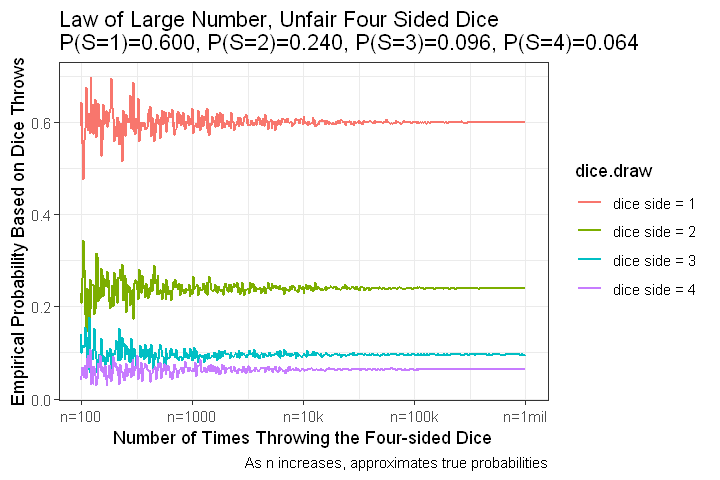

In [12]:
# Graph
# Control Graph Size
options(repr.plot.width = 6, repr.plot.height = 4)

# x-labels
x.labels <- c('n=100', 'n=1000', 'n=10k', 'n=100k', 'n=1mil')
x.breaks <- c(100, 1000, 10000, 100000, 1000000)

# title line 2
title_line2 <- sprintf("P(S=1)=%0.3f, P(S=2)=%0.3f, P(S=3)=%0.3f, P(S=4)=%0.3f",
                   experimental.outcome.prob[1], experimental.outcome.prob[2],
                   experimental.outcome.prob[3], experimental.outcome.prob[4])
        
# Graph Results--Draw
line.plot <- draw.outcomes.long %>% 
  ggplot(aes(x=draw.count, y=value,
             group=dice.draw, 
             colour=dice.draw)) + 
  geom_line(size=0.75) +
  labs(title = paste0('Law of Large Number, Unfair Four Sided Dice\n', title_line2),
       x = 'Number of Times Throwing the Four-sided Dice',
       y = 'Empirical Probability Based on Dice Throws',
       caption = 'As n increases, approximates true probabilities') +
  scale_x_continuous(trans='log10', labels = x.labels, breaks = x.breaks) +
  theme_bw()

print(line.plot)